In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Data/train.csv")

In [3]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


OLS

In [4]:
x = df['x'].tolist()
y = df['y'].tolist()

In [5]:
x = sm.add_constant(x)

In [6]:
result = sm.OLS(y,x).fit()

In [7]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          1.33e-294
Time:                        10:54:50   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4618      0.360     -1.284      0.2

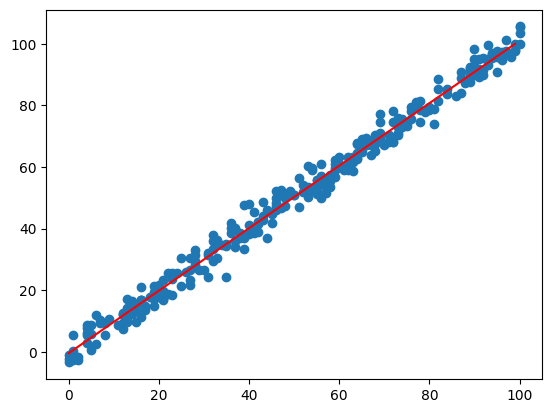

In [8]:
x = df['x'].tolist()
plt.scatter(x,y)

x = np.arange(df['x'].min(), df['x'].max(), 1)
y = 1.0143*x - 0.4618
plt.plot(y, 'r')

plt.show()


LINEAR REGRESSION

In [9]:
from sklearn import linear_model, model_selection

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df['x'], df['y'], test_size=0.4, random_state=1)

In [17]:
X_train  = np.array(X_train).reshape(-1,1)

In [18]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
lr.coef_

array([1.01084998])

In [24]:
X_test = np.array(X_test).reshape(-1,1)
lr.score(X_test, y_test)

0.9883489168112862

In [32]:
lr.predict(np.array([26]).reshape(-1,1))

array([25.80120516])

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
pl = PolynomialFeatures(degree=2)

In [37]:
X_p = pl.fit_transform(np.array(df['x']).reshape(-1,1))

In [39]:
lr2 = linear_model.LinearRegression()

In [40]:
lr2.fit(X_p , df['y'])

LinearRegression()

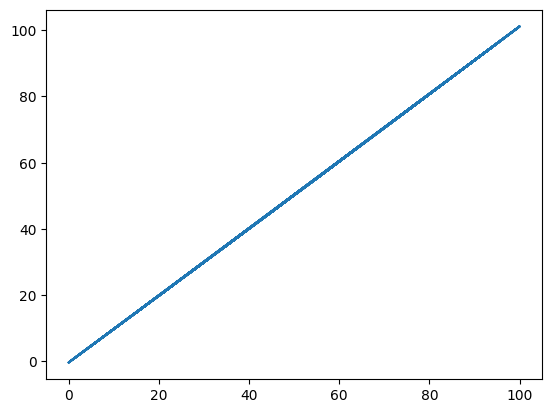

In [45]:
X = np.array(df['x']).reshape(-1,1)
plt.plot(X,lr2.predict(pl.fit_transform(X)))